<a href="https://colab.research.google.com/github/Satyanarayana53/FMML_Projects_and_labs/blob/main/FMML_M6Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression Lab 2: Loss Functions



```
Module Coordinator : Akshit Garg
```


## Motivation

The main goal of machine learning tasks is to "learn" something about data we feed to our models. But how does the model actually learn anything? To understand this, we need to first understand what objective functions are.

Mathematically, objective functions are a function whose values we desire to minimize/maximize. In the context of machine learning, the objective is commonly referred to as a **loss function**. Loss functions indicate how well the model is doing on the dataset.

The value of the objective function is simply called **loss**. Our goal is to eventually find the best model parameters that has the least average loss on the data after training.


We are familiar with the idea of **error** from the linear regression lab. RMSE is a common loss function used in machine learning. However, there are many other loss functions employed, depending on what the task is (classification, regression etc.). In this lab, we will take a look at some common loss functions, and understand why they are used where they are.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# interactive visualization

# 1. Regression


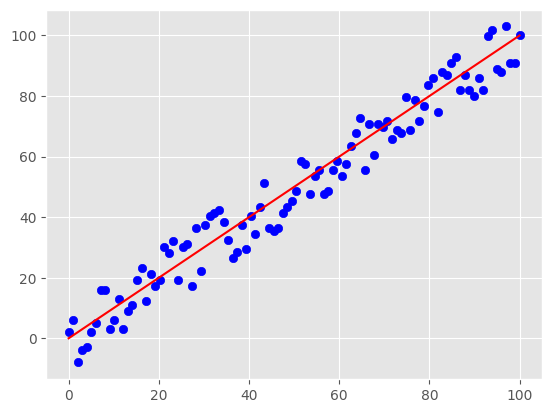

In [7]:
# initializing random data

np.random.seed(0)
x = np.linspace(0,100,100)
y_actual = np.copy(x)
y_pred = x + np.random.randint(-10,10,100)

plt.plot(x,y_actual,color="red")
plt.scatter(x,y_pred,color="blue")
plt.show()

### Mean Squared Error

As we have seen before, the formula for MSE is

$MSE = \frac{1}{m} \sum_{i=1}^n (y-y_p)^2$

The image below depicts a visualization of what the squared error is.

<img src="https://drive.google.com/uc?export=view&id=12jmqRrrqknIWKhwRpgRIJAErBjkEcyx9" width="350" height="350" align="middle"/>

MSE is also referred to as L2 loss.

Typically, we would want the units of error to be the same as the data, so we use Root Mean Squared Error instead.



In [8]:
mse = np.mean((y_actual-y_pred)**2)
print("MSE is: {}".format(mse))
print("RMSE is: {}".format(np.sqrt(mse)))

MSE is: 38.68
RMSE is: 6.219324722186485


### Mean Absolute Error

$MAE = \frac{1}{m} \sum_{i=1}^n |y-y_p|$

MAE is also commonly referred to as L1 loss.

In [9]:
mae = np.mean(np.abs(y_actual-y_pred))
print("MAE is: {}".format(mae))

MAE is: 5.5


MSE penalizes the model for making large errors by squaring the difference. However, this also means that MSE cannot handle outliers well, since they would throw the model off.

On the other hand, MAE is robust to outliers. But, MAE is non-differentiable, making it difficult to perform mathematical operations on it.

Hence, RMSE is most commonly used as a metric for evaluation.

# 2. Classification

Classification tasks involve some data, along with labels assigned to that data. For example, we may have pictures of cats and dogs, and the corresponding labels assigned to those images. We then want to train a model that can predict a label for some input image belonging to either label class (cat or dog).

## The concept of maximum likelihood

Ideally, we would want to obtain a model $\hat{\theta}$ which maximizes the probability of correctly predicting data. Mathematically, the likelihood is:

$ \prod_{i=1}^{N}  \: \hat{\theta_i}^{\theta_i}$

This is because our actual data ($\theta_i$) is either 0 or 1 depending on the label of the data, and our predicted data ($\hat{\theta_i}$) is a probability.

We usually consider the negative log of the likelihood, since log is monotonic and easier to deal with as an optimization problem.

Hence, we have

$MLE = $ arg min $\: - \sum_{i=1}^{N} \theta_i \: log \: \hat{\theta_i}$

\


## Entropy and Cross-Entropy

For some event $x$, we can obtain **information** based on its probability distribution. For example, for some event that occurs with $p=1$, we gain no information. Now, if we flip a coin and see that we obtained heads, we say that we got 1 bit of information.

Thus, the information $I$ of some event $x$ is:

$I = -log_2 \: p(x)$

We say that events with a low probability of occuring give high information, and those with a low probability give low information.

Now, if we have some random variable $X$, its **entropy** is the expected value of the information obtained.

$H(x) = - \sum_{k} p_k \: log \: p_k$

Now, suppose we are trying to correctly predict labels of some data. Let P be the true distribution of the labels, and Q be the predicted distribution of labels.

Cross-Entropy is then defined as:

$H(P,Q) = - \sum_{x} P(x)\: log \: Q(x)$

which is basically the entropy between two probability distributions over the same events.

\


## MLE and Cross-Entropy

So, in the case of classification, the equation for minimization of the cross-entropy between the actual data and the predicted data would be:

arg min $\: -\sum_{i=1}^{N} P(x) \: log \: Q(x)$

$= $ arg min $\: -\sum_{i=1}^{N} \theta_i \: log \: \hat{\theta_i}$


which is exactly the same as what we had obtained for minimizing the negative log likelihood. Hence, the two problems are equivalent.

1/1+e^(-x)

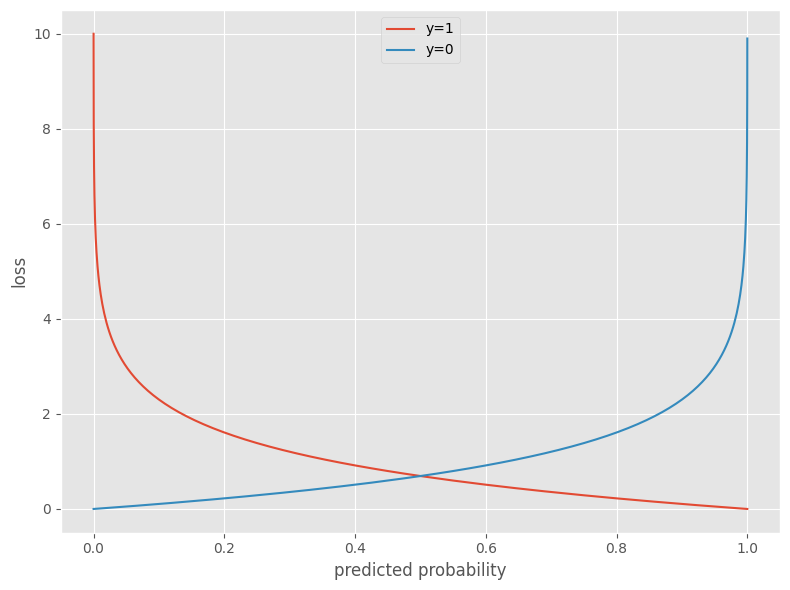

In [10]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

def cross_entropy_loss(y_,y):
  if y==1:
    return -np.log(y_)

  return -np.log(1-y_)

z = np.arange(-10, 10, 0.1)
h_z = sigmoid(z)

cost_1 = cross_entropy_loss(h_z, 1)
cost_0 = cross_entropy_loss(h_z, 0)

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(h_z, cost_1, label='y=1')
plt.plot(h_z, cost_0, label='y=0')
plt.xlabel('predicted probability')
plt.ylabel('loss')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## KNN-regression

Till now, we have studied KNN as a classification algorithm, which uses feature similarity and voting to decide the class labels of unseen data.

For regression, we use the same idea: We take the y-values of the k nearest neighbours, and compute their average, which is our predicted y-value. We do this for every x whose value we want to predict.

In the visualization below, we have k=3, and the red dots are the new x-values whose output we want to predict.

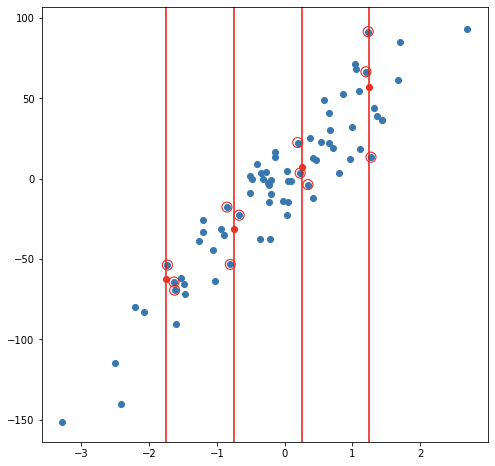

In [11]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [12]:
train_path = "https://raw.githubusercontent.com/PranavTadimeti/Regression-lab2/main/BigMart-train.csv"

train = pd.read_csv(train_path)

In [13]:
# Preprocess Data

def preprocess(df):
  mean_weight = df['Item_Weight'].mean()
  df['Item_Weight'].fillna(mean_weight,inplace=True)

  mode_size = df['Outlet_Size'].mode()
  df['Outlet_Size'].fillna(mode_size,inplace=True)

  df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

  return pd.get_dummies(df)

train = preprocess(train)

train.head()

<ipython-input-13-16fc6f082614>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(mean_weight,inplace=True)
<ipython-input-13-16fc6f082614>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,2009,443.4228,False,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.50,0.016760,141.6180,1999,2097.2700,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.20,0.000000,182.0950,1998,732.3800,False,False,True,False,False,...,False,False,False,False,False,True,True,False,False,False
4,8.93,0.000000,53.8614,1987,994.7052,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False


In [14]:
train , test = train_test_split(train, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

In [15]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [16]:
def knn_regression(k,x_train,y_train,x_test,y_test):
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

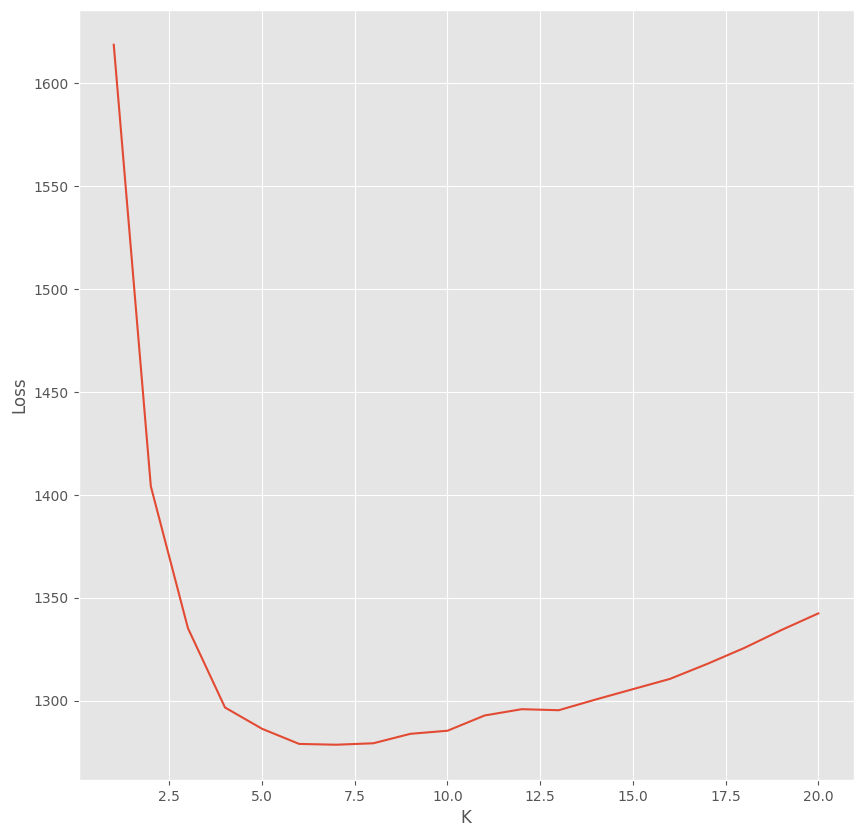

Minimum error 1278.5816281094171 is at k = 6


In [17]:
rmse_val = []

for k in range(1,21):
  knn_regression(k,x_train,y_train,x_test,y_test)

figure = plt.figure(figsize=(10,10))
plt.plot(np.arange(1,21),rmse_val)
plt.xlabel("K")
plt.ylabel("Loss")
plt.show()

rmse_val = np.asarray(rmse_val)
print("Minimum error {} is at k = {}".format(np.min(rmse_val),np.argmin(rmse_val)))

## Exercises

1. Try out these loss functions on regression tasks, and try to understand the model performance based on the loss function.



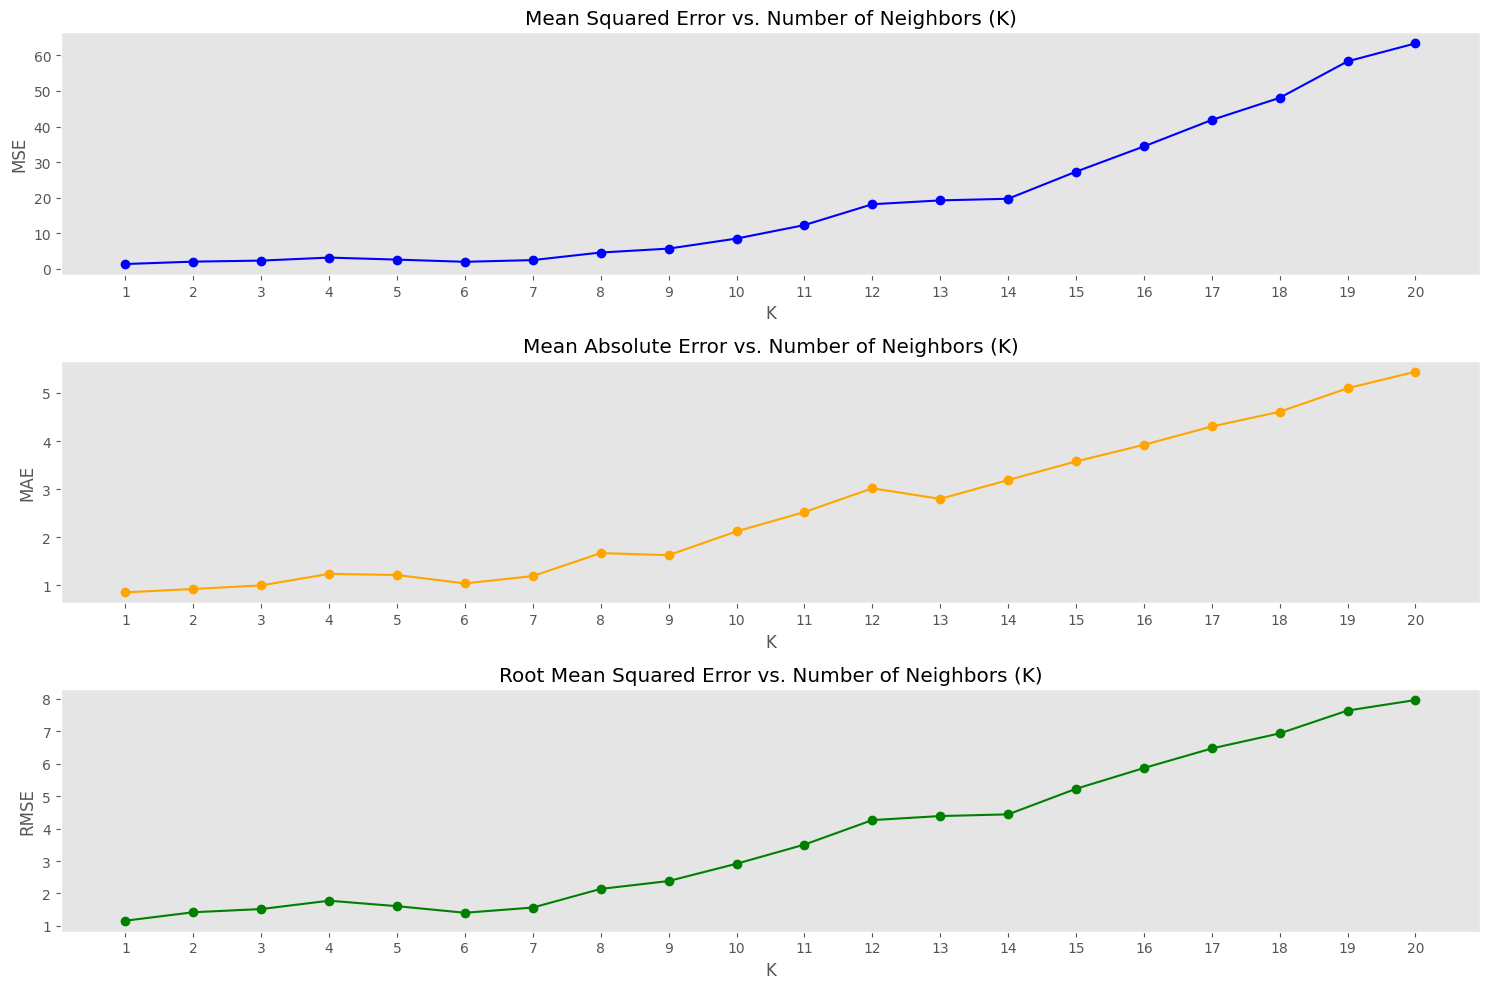

Minimum MSE 1.3483202745887781 is at k = 1
Minimum MAE 0.848407309990898 is at k = 1
Minimum RMSE 1.1611719401487353 is at k = 1


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lists to store the loss values
mse_val = []
mae_val = []
rmse_val = []

def knn_regression(k, x_train, y_train, x_test, y_test):
    # Create KNN regressor with k neighbors
    model = KNeighborsRegressor(n_neighbors=k)
    # Fit the model on the training data
    model.fit(x_train, y_train)
    # Make predictions on the test data
    predictions = model.predict(x_test)

    # Calculate MSE, MAE, and RMSE
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mse)

    # Append the loss values to their respective lists
    mse_val.append(mse)
    mae_val.append(mae)
    rmse_val.append(rmse)

# Loop over k values from 1 to 20
for k in range(1, 21):
    knn_regression(k, x_train, y_train, x_test, y_test)

# Convert loss values to numpy arrays for easier manipulation
mse_val = np.asarray(mse_val)
mae_val = np.asarray(mae_val)
rmse_val = np.asarray(rmse_val)

# Plotting the loss values
plt.figure(figsize=(15, 10))

# Plot MSE
plt.subplot(3, 1, 1)
plt.plot(np.arange(1, 21), mse_val, marker='o', color='blue')
plt.xlabel("K")
plt.ylabel("MSE")
plt.title("Mean Squared Error vs. Number of Neighbors (K)")
plt.xticks(np.arange(1, 21))
plt.grid()

# Plot MAE
plt.subplot(3, 1, 2)
plt.plot(np.arange(1, 21), mae_val, marker='o', color='orange')
plt.xlabel("K")
plt.ylabel("MAE")
plt.title("Mean Absolute Error vs. Number of Neighbors (K)")
plt.xticks(np.arange(1, 21))
plt.grid()

# Plot RMSE
plt.subplot(3, 1, 3)
plt.plot(np.arange(1, 21), rmse_val, marker='o', color='green')
plt.xlabel("K")
plt.ylabel("RMSE")
plt.title("Root Mean Squared Error vs. Number of Neighbors (K)")
plt.xticks(np.arange(1, 21))
plt.grid()

plt.tight_layout()
plt.show()

# Print the minimum error and the corresponding k value for each loss function
print("Minimum MSE {} is at k = {}".format(np.min(mse_val), np.argmin(mse_val) + 1))
print("Minimum MAE {} is at k = {}".format(np.min(mae_val), np.argmin(mae_val) + 1))
print("Minimum RMSE {} is at k = {}".format(np.min(rmse_val), np.argmin(rmse_val) + 1))

**2. Explore other loss functions and try to understand when and why they are used.**

**1. Mean Squared Error (MSE)**

Formula: [ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2]

**When to Use:**
MSE is ideal when the error distribution is assumed to be Gaussian (normal).
It is sensitive to outliers, making it suitable when larger errors need to be penalized more heavily.

**Why Use It:**
MSE is differentiable, which is beneficial for optimization algorithms that rely on gradient descent.
It provides a clear measure of average error magnitude, which can be useful for model evaluation.

**2. Mean Absolute Error (MAE)**

Formula: [ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|]

**When to Use:**
MAE is preferred when the dataset contains outliers or when the error distribution is not Gaussian.
It is more robust to outliers compared to MSE.

**Why Use It:**
MAE provides a straightforward interpretation of average error in the same units as the target variable.
It is less sensitive to large errors, making it suitable for applications where outliers are expected.

**3. Huber Loss**

Formula:

[ L_\delta(y, \hat{y}) = \begin{cases} \frac{1}{2}(y - \hat{y})^2 & \text{for } |y - \hat{y}| \leq \delta \ \delta \cdot (|y - \hat{y}| - \frac{1}{2}\delta) & \text{otherwise} \end{cases}]

**When to Use:**
Huber loss is useful when you want a balance between MSE and MAE, especially in datasets with outliers.
It is effective when you want to limit the influence of outliers while still maintaining differentiability.

**Why Use It:**
It behaves like MSE for small errors and like MAE for large errors, providing a compromise between sensitivity to outliers and smoothness.

**4. Log-Cosh Loss**

Formula:

[ L(y, \hat{y}) = \sum_{i=1}^{n} \log(\cosh(\hat{y}_i - y_i))]

**When to Use:**
Log-Cosh loss is useful when you want a smooth approximation of MAE that is less sensitive to outliers than MSE.

**Why Use It:**
It is differentiable everywhere, making it suitable for optimization.
It combines the benefits of both MSE and MAE, providing robustness to outliers while maintaining smoothness.

**5. Quantile Loss (Pinball Loss)**

Formula:

[ L(y, \hat{y}) = \begin{cases} \tau (y - \hat{y}) & \text{if } y \geq \hat{y} \ (1 - \tau)(\hat{y} - y) & \text{otherwise} \end{cases}]

**When to Use:**
Quantile loss is used in quantile regression, where you want to predict a specific quantile (e.g., median, 90th percentile) of the target variable.

**Why Use It:**
It allows for modeling the conditional quantiles of the response variable, providing a more comprehensive view of the data distribution.

**6. Mean Logarithmic Error (MLE)**

Formula:

[ \text{MLE} = \frac{1}{n} \sum_{i=1}^{n} \log(1 + |y_i - \hat{y}_i|)]

**When to Use:**
MLE is useful when the target variable can take on a wide range of values, especially when values are positive and can vary significantly.

**Why Use It:**
It focuses on relative error rather than absolute error, which can be beneficial in certain regression



3. Try out KNN-regression on other datasets see which values of K give the best results.

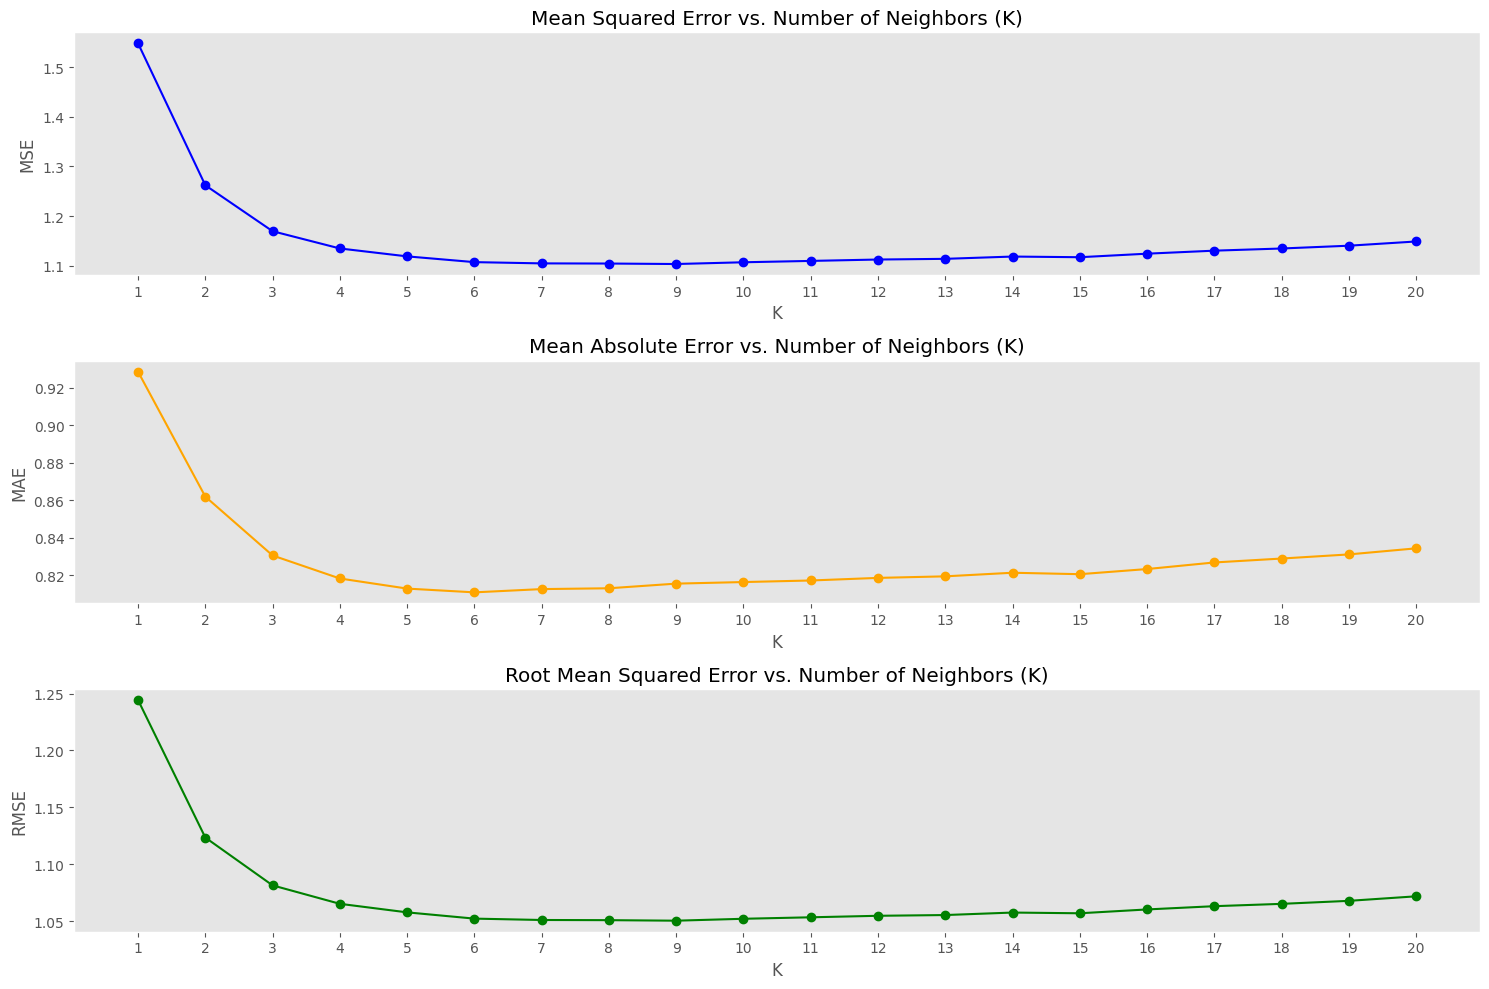

Minimum MSE 1.103251681789815 is at k = 9
Minimum MAE 0.8107863069282946 is at k = 6
Minimum RMSE 1.0503578827189402 is at k = 9


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lists to store the loss values
mse_val = []
mae_val = []
rmse_val = []

def knn_regression(k, x_train, y_train, x_test, y_test):
    # Create KNN regressor with k neighbors
    model = KNeighborsRegressor(n_neighbors=k)
    # Fit the model on the training data
    model.fit(x_train, y_train)
    # Make predictions on the test data
    predictions = model.predict(x_test)

    # Calculate MSE, MAE, and RMSE
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mse)

    # Append the loss values to their respective lists
    mse_val.append(mse)
    mae_val.append(mae)
    rmse_val.append(rmse)

# Loop over k values from 1 to 20
for k in range(1, 21):
    knn_regression(k, x_train, y_train, x_test, y_test)

# Convert loss values to numpy arrays for easier manipulation
mse_val = np.asarray(mse_val)
mae_val = np.asarray(mae_val)
rmse_val = np.asarray(rmse_val)

# Plotting the loss values
plt.figure(figsize=(15, 10))

# Plot MSE
plt.subplot(3, 1, 1)
plt.plot(np.arange(1, 21), mse_val, marker='o', color='blue')
plt.xlabel("K")
plt.ylabel("MSE")
plt.title("Mean Squared Error vs. Number of Neighbors (K)")
plt.xticks(np.arange(1, 21))
plt.grid()

# Plot MAE
plt.subplot(3, 1, 2)
plt.plot(np.arange(1, 21), mae_val, marker='o', color='orange')
plt.xlabel("K")
plt.ylabel("MAE")
plt.title("Mean Absolute Error vs. Number of Neighbors (K)")
plt.xticks(np.arange(1, 21))
plt.grid()

# Plot RMSE
plt.subplot(3, 1, 3)
plt.plot(np.arange(1, 21), rmse_val, marker='o', color='green')
plt.xlabel("K")
plt.ylabel("RMSE")
plt.title("Root Mean Squared Error vs. Number of Neighbors (K)")
plt.xticks(np.arange(1, 21))
plt.grid()

plt.tight_layout()
plt.show()

# Print the minimum error and the corresponding k value for each loss function
print("Minimum MSE {} is at k = {}".format(np.min(mse_val), np.argmin(mse_val) + 1))
print("Minimum MAE {} is at k = {}".format(np.min(mae_val), np.argmin(mae_val) + 1))
print("Minimum RMSE {} is at k = {}".format(np.min(rmse_val), np.argmin(rmse_val) + 1))

4. Try exploring what will happen if K is set to 1 or K is set to size of whole training dataset.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate KNN regression for a given K
def evaluate_knn(k, x_train, y_train, x_test, y_test):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)

    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mse)

    return mse, mae, rmse

# Evaluate K = 1
k1_metrics = evaluate_knn(1, x_train, y_train, x_test, y_test)

# Evaluate K = size of training dataset
k_full_metrics = evaluate_knn(len(y_train), x_train, y_train, x_test, y_test)

# Print the results
print("Metrics for K = 1:")
print("MSE:", k1_metrics[0])
print("MAE:", k1_metrics[1])
print("RMSE:", k1_metrics[2])

print("\nMetrics for K = size of training dataset (K = {}):".format(len(y_train)))
print("MSE:", k_full_metrics[0])
print("MAE:", k_full_metrics[1])
print("RMSE:", k_full_metrics[2])

Metrics for K = 1:
MSE: 1.5482051457520347
MAE: 0.9286355184108526
RMSE: 1.2442689201905008

Metrics for K = size of training dataset (K = 16512):
MSE: 1.3106960720039365
MAE: 0.9060685490007149
RMSE: 1.1448563543099792


## References ##
1. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
2. https://www.geeksforgeeks.org/k-nearest-neighbours/
3. https://bookdown.org/tpinto_home/Regression-and-Classification/k-nearest-neighbours-regression.html#:~:text=KNN%20regression%20is%20a%20non,observations%20in%20the%20same%20neighbourhood